# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


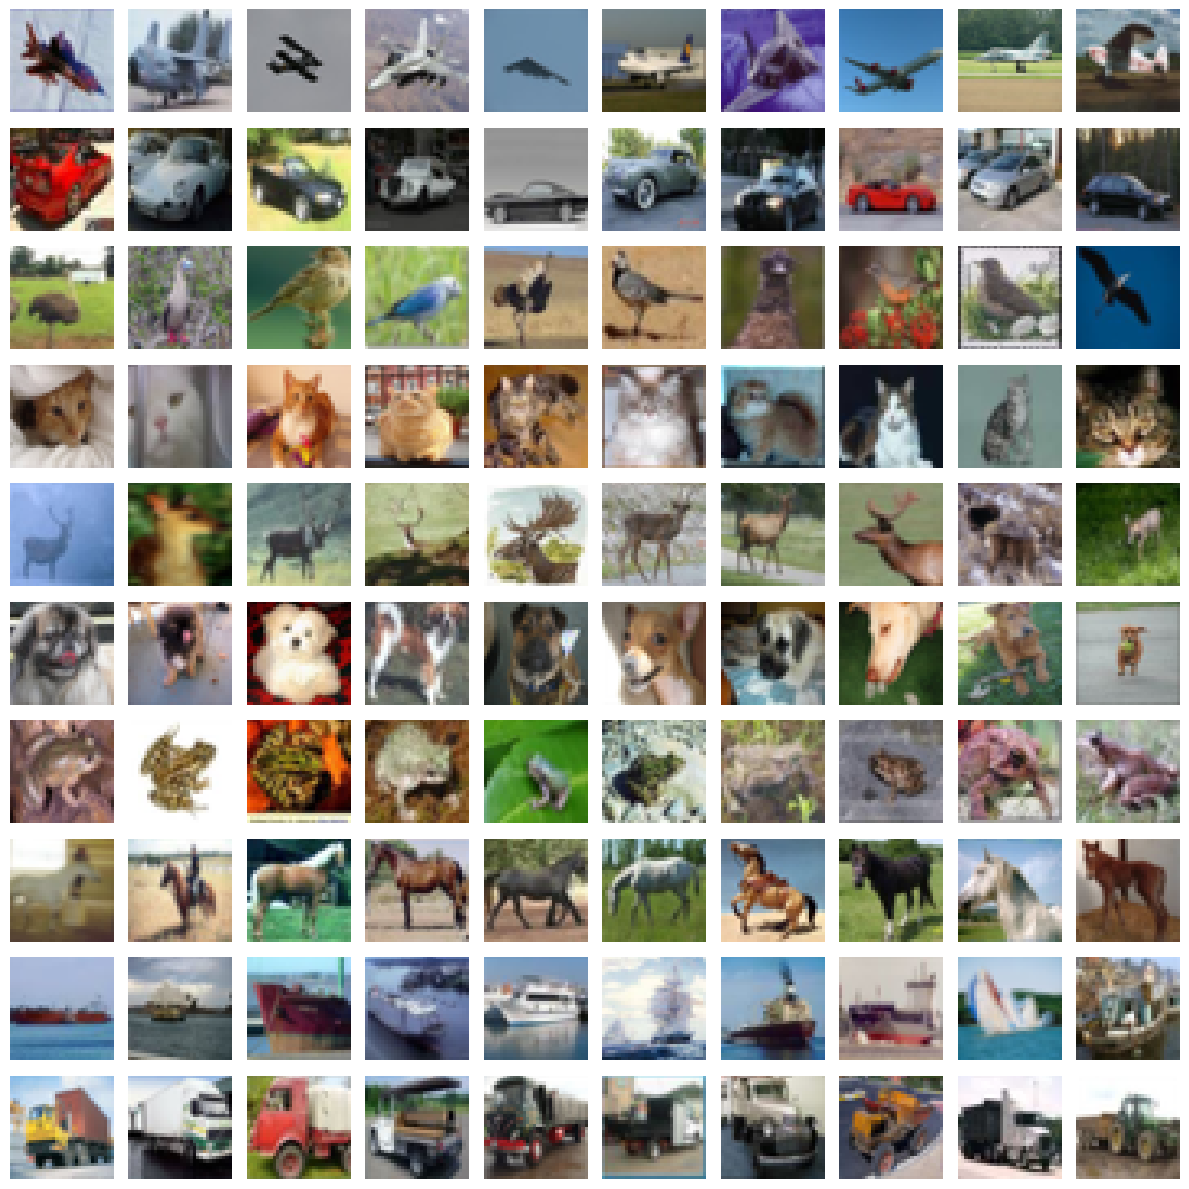

x_train shape: (50000, 32, 32, 3)
y_train shape (one-hot): (50000, 10)


In [2]:
# Your code here :


# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create 10x10 plot: 10 samples per class
def plot_10x10_samples(x, y, class_names):
    plt.figure(figsize=(12, 12))
    for class_id in range(10):
        # Get indices of images belonging to the class
        idxs = np.where(y.flatten() == class_id)[0]
        # Randomly select 10 samples
        selected = np.random.choice(idxs, 10, replace=False)

        for i, idx in enumerate(selected):
            plt_idx = class_id * 10 + i + 1
            plt.subplot(10, 10, plt_idx)
            plt.imshow(x[idx])
            plt.axis('off')
            if i == 0:
                plt.ylabel(class_names[class_id], fontsize=10)
    plt.tight_layout()
    plt.show()

plot_10x10_samples(x_train, y_train, class_names)

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Normalize the images (pixel values 0–255 → 0–1)
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Verify shapes
print("x_train shape:", x_train_normalized.shape)
print("y_train shape (one-hot):", y_train_encoded.shape)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [5]:
# Your code here :

from keras.backend import clear_session
from tensorflow.keras import layers, models

# Clear any previous model state
clear_session()

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Input layer

    layers.Conv2D(32, (3, 3), activation='relu'),  # Conv layer
    layers.MaxPooling2D(pool_size=(2, 2)),         # Max pooling

    layers.Flatten(),                              # Flatten to 1D
    layers.Dense(100, activation='relu'),          # Dense hidden layer
    layers.Dense(10, activation='softmax')         # Output layer for 10 classes
])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [6]:
# Your code here :

from tensorflow.keras.optimizers import SGD

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),   # You can tune learning rate if needed
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train_normalized, y_train_encoded,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_encoded),
    verbose=2
)


Epoch 1/50
98/98 - 6s - 65ms/step - accuracy: 0.1913 - loss: 2.2307 - val_accuracy: 0.2318 - val_loss: 2.1509
Epoch 2/50
98/98 - 1s - 10ms/step - accuracy: 0.2666 - loss: 2.0810 - val_accuracy: 0.2824 - val_loss: 2.0233
Epoch 3/50
98/98 - 1s - 13ms/step - accuracy: 0.3079 - loss: 1.9799 - val_accuracy: 0.3265 - val_loss: 1.9426
Epoch 4/50
98/98 - 1s - 10ms/step - accuracy: 0.3305 - loss: 1.9249 - val_accuracy: 0.3359 - val_loss: 1.9046
Epoch 5/50
98/98 - 1s - 10ms/step - accuracy: 0.3470 - loss: 1.8830 - val_accuracy: 0.3398 - val_loss: 1.8743
Epoch 6/50
98/98 - 1s - 10ms/step - accuracy: 0.3585 - loss: 1.8528 - val_accuracy: 0.3672 - val_loss: 1.8337
Epoch 7/50
98/98 - 1s - 10ms/step - accuracy: 0.3696 - loss: 1.8226 - val_accuracy: 0.3734 - val_loss: 1.8115
Epoch 8/50
98/98 - 1s - 13ms/step - accuracy: 0.3813 - loss: 1.7935 - val_accuracy: 0.3736 - val_loss: 1.7918
Epoch 9/50
98/98 - 1s - 10ms/step - accuracy: 0.3886 - loss: 1.7688 - val_accuracy: 0.3903 - val_loss: 1.7563
Epoch 10/5

*   Plot the cross entropy loss curve and the accuracy curve

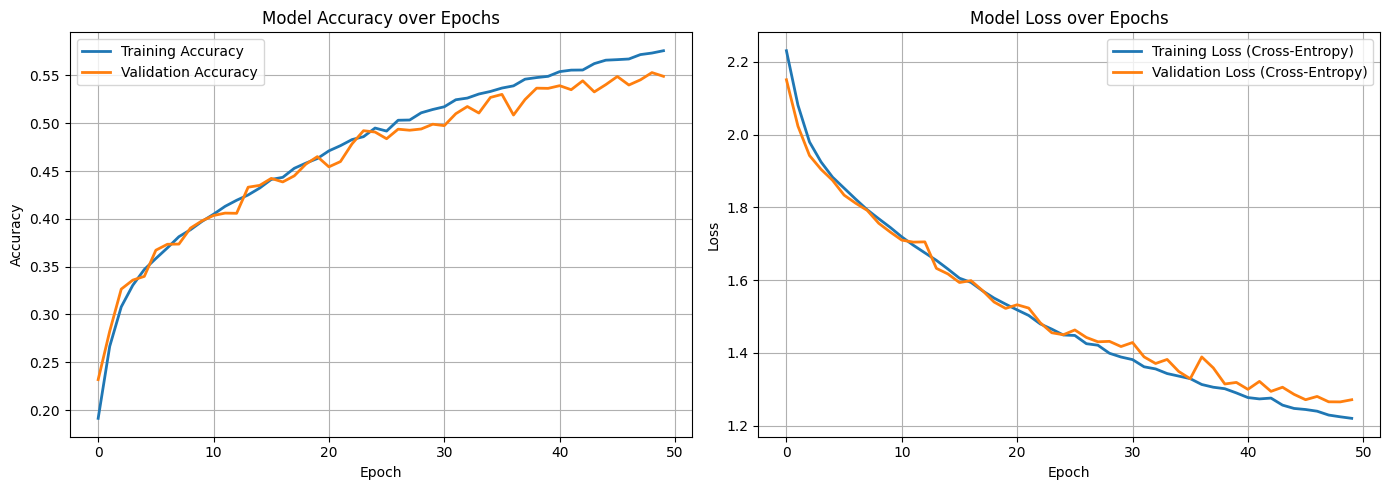

In [7]:
# Your code here :

import matplotlib.pyplot as plt

# Create side-by-side plots for Accuracy and Loss
plt.figure(figsize=(14, 5))

# Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss (Cross-Entropy)', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss (Cross-Entropy)', linewidth=2)
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
# Your code here :

from keras.backend import clear_session
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD

# Reset session
clear_session()

# Define the VGG-like deeper CNN model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    # VGG-style block
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()

# Train the model
history = model.fit(
    x_train_normalized, y_train_encoded,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_encoded),
    verbose=2
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 - 9s - 92ms/step - accuracy: 0.1850 - loss: 2.2339 - val_accuracy: 0.2315 - val_loss: 2.1592
Epoch 2/50
98/98 - 2s - 21ms/step - accuracy: 0.2582 - loss: 2.0905 - val_accuracy: 0.2821 - val_loss: 2.0263
Epoch 3/50
98/98 - 2s - 22ms/step - accuracy: 0.2976 - loss: 1.9887 - val_accuracy: 0.3064 - val_loss: 1.9442
Epoch 4/50
98/98 - 2s - 22ms/step - accuracy: 0.3235 - loss: 1.9217 - val_accuracy: 0.3409 - val_loss: 1.8722
Epoch 5/50
98/98 - 3s - 26ms/step - accuracy: 0.3491 - loss: 1.8554 - val_accuracy: 0.3715 - val_loss: 1.8054
Epoch 6/50
98/98 - 2s - 22ms/step - accuracy: 0.3667 - loss: 1.8083 - val_accuracy: 0.3752 - val_loss: 1.7716
Epoch 7/50
98/98 - 2s - 22ms/step - accuracy: 0.3802 - loss: 1.7694 - val_accuracy: 0.3952 - val_loss: 1.7262
Epoch 8/50
98/98 - 3s - 26ms/step - accuracy: 0.3934 - loss: 1.7338 - val_accuracy: 0.3930 - val_loss: 1.7156
Epoch 9/50
98/98 - 3s - 28ms/step - accuracy: 0.4054 - loss: 1.7070 - val_accuracy: 0.4084 - val_loss: 1.6841
Epoch 10/5

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
# Your code here :

from tensorflow.keras.optimizers import SGD

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train_normalized, y_train_encoded,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_encoded),
    verbose=2
)


Epoch 1/50
98/98 - 6s - 57ms/step - accuracy: 0.6142 - loss: 1.1059 - val_accuracy: 0.5941 - val_loss: 1.1494
Epoch 2/50
98/98 - 2s - 22ms/step - accuracy: 0.6399 - loss: 1.0256 - val_accuracy: 0.6184 - val_loss: 1.0888
Epoch 3/50
98/98 - 2s - 25ms/step - accuracy: 0.6632 - loss: 0.9687 - val_accuracy: 0.6219 - val_loss: 1.0777
Epoch 4/50
98/98 - 2s - 22ms/step - accuracy: 0.6843 - loss: 0.9052 - val_accuracy: 0.6307 - val_loss: 1.0601
Epoch 5/50
98/98 - 3s - 26ms/step - accuracy: 0.6970 - loss: 0.8671 - val_accuracy: 0.6367 - val_loss: 1.0691
Epoch 6/50
98/98 - 2s - 24ms/step - accuracy: 0.7176 - loss: 0.8107 - val_accuracy: 0.6489 - val_loss: 1.0099
Epoch 7/50
98/98 - 2s - 24ms/step - accuracy: 0.7384 - loss: 0.7525 - val_accuracy: 0.6420 - val_loss: 1.0548
Epoch 8/50
98/98 - 3s - 26ms/step - accuracy: 0.7553 - loss: 0.7057 - val_accuracy: 0.6562 - val_loss: 1.0114
Epoch 9/50
98/98 - 2s - 22ms/step - accuracy: 0.7770 - loss: 0.6495 - val_accuracy: 0.6560 - val_loss: 1.0343
Epoch 10/5

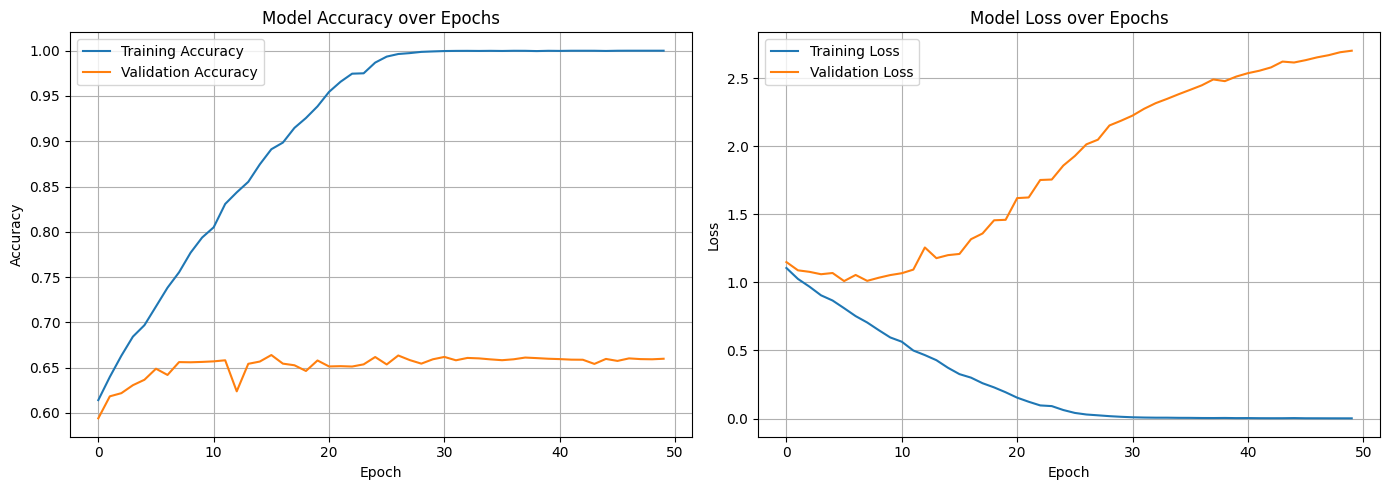

In [12]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [13]:
# Your code here :

history1 = history  # for the first (simple) model

# after training the second model:
history2 = history  # for the VGG-style model


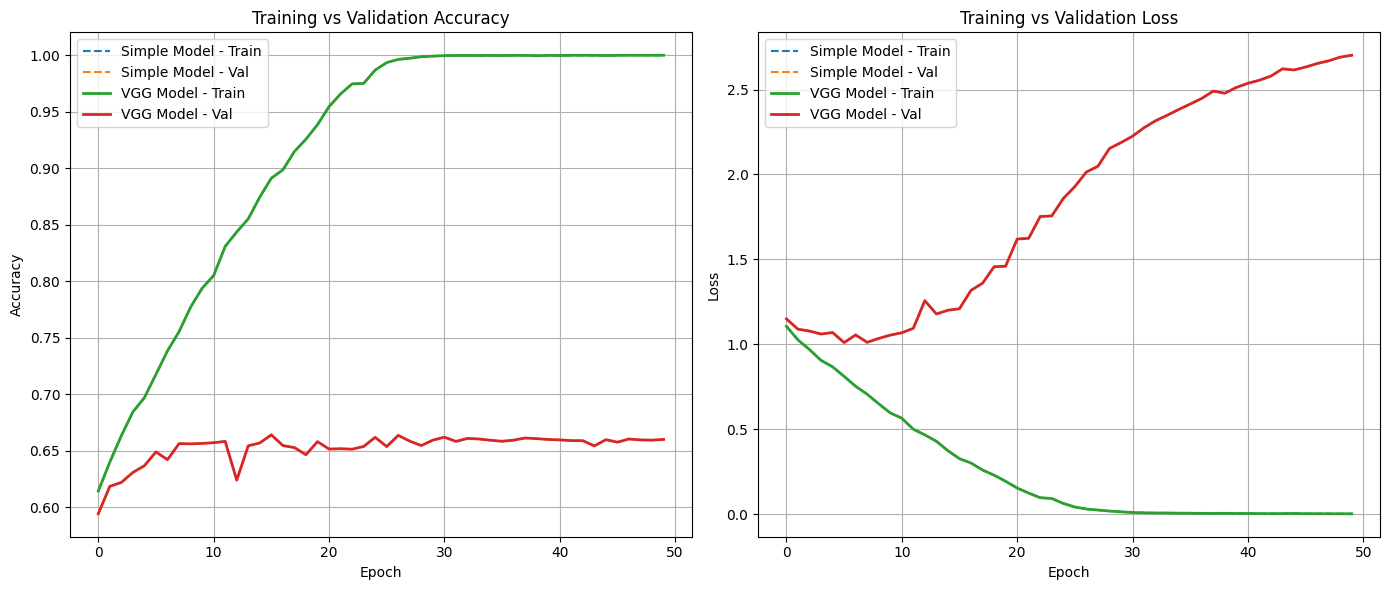

In [14]:
import matplotlib.pyplot as plt

# Plot comparison: Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Simple Model - Train', linestyle='--')
plt.plot(history1.history['val_accuracy'], label='Simple Model - Val', linestyle='--')
plt.plot(history2.history['accuracy'], label='VGG Model - Train', linewidth=2)
plt.plot(history2.history['val_accuracy'], label='VGG Model - Val', linewidth=2)
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot comparison: Loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Simple Model - Train', linestyle='--')
plt.plot(history1.history['val_loss'], label='Simple Model - Val', linestyle='--')
plt.plot(history2.history['loss'], label='VGG Model - Train', linewidth=2)
plt.plot(history2.history['val_loss'], label='VGG Model - Val', linewidth=2)
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Comment on the observation**

Yes, the deeper model performs better.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


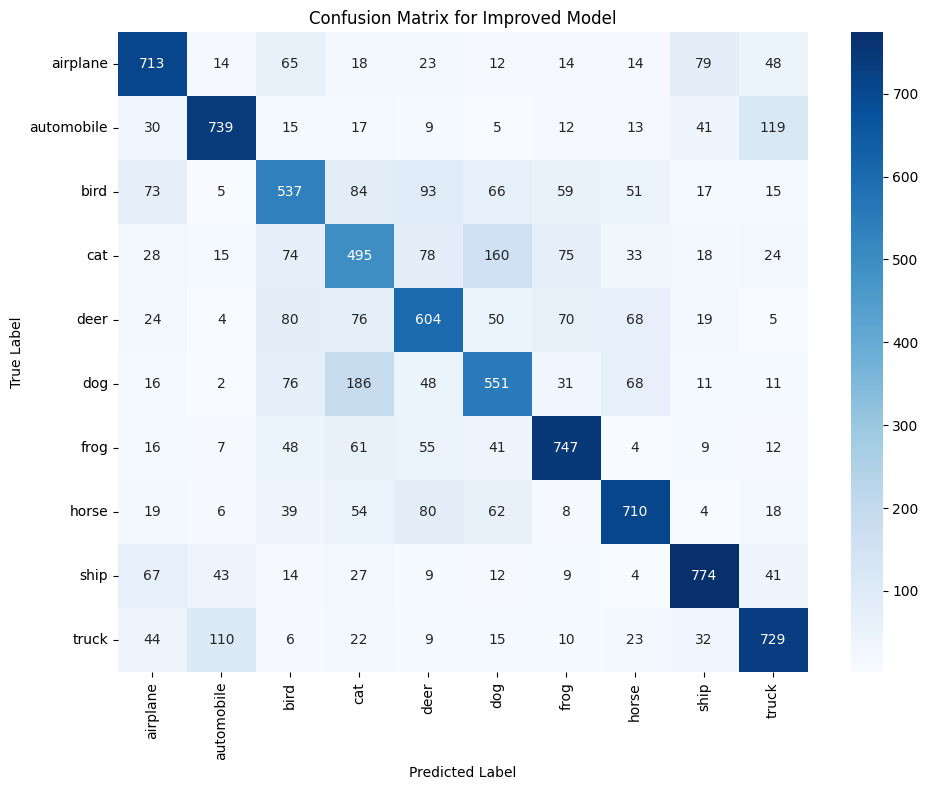

Classification Report:

              precision    recall  f1-score   support

    airplane       0.69      0.71      0.70      1000
  automobile       0.78      0.74      0.76      1000
        bird       0.56      0.54      0.55      1000
         cat       0.48      0.49      0.49      1000
        deer       0.60      0.60      0.60      1000
         dog       0.57      0.55      0.56      1000
        frog       0.72      0.75      0.73      1000
       horse       0.72      0.71      0.71      1000
        ship       0.77      0.77      0.77      1000
       truck       0.71      0.73      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [15]:
# Your code here:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Predict on test data
y_test_pred_probs = model.predict(x_test_normalized, verbose=0)
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)

# Step 2: True class labels
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

# Step 3: Confusion matrix
cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Improved Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Step 5: Classification Report
print("Classification Report:\n")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=class_names))


**Comment here :**

The model often confuses cats with dogs, and trucks with automobiles. These misclassifications are expected given the low resolution and visual similarity of the classes. Improving resolution, model depth, or using transfer learning might help reduce these confusions.

*    Print the test accuracy for the trained model.

In [16]:
# Your code here:

# Evaluate the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_encoded, verbose=2)

# Print test accuracy
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 1s - 4ms/step - accuracy: 0.6599 - loss: 2.7019

✅ Test Accuracy: 65.99%
Test Loss: 2.7019


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [17]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here:

from keras.backend import clear_session
from tensorflow.keras import layers, models

# Reset session
clear_session()

# Define full VGG-style CNN model
model = models.Sequential([
    # Input Layer
    layers.Input(shape=(64, 64, 3)),

    # Block 1: 2 × Conv(64) + MaxPool
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 2: 2 × Conv(128) + MaxPool
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 3: 2 × Conv(256) + MaxPool
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Display summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resize train and test images to 64x64
x_train_resized = tf.image.resize(x_train, [64, 64]).numpy()
x_test_resized = tf.image.resize(x_test, [64, 64]).numpy()

# Normalize pixel values to 0–1
x_train_resized = x_train_resized.astype('float32') / 255.0
x_test_resized = x_test_resized.astype('float32') / 255.0


In [8]:
from tensorflow.keras import layers, models

# Define a simple model
model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [10]:
# Step 1: One-hot encode
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Step 2: Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train
model.fit(x_train_resized, y_train_encoded,
          epochs=50,
          batch_size=512,
          validation_data=(x_test_resized, y_test_encoded),
          verbose=2)


Epoch 1/50
98/98 - 13s - 130ms/step - accuracy: 0.2702 - loss: 2.2505 - val_accuracy: 0.4140 - val_loss: 1.6928
Epoch 2/50
98/98 - 12s - 127ms/step - accuracy: 0.4450 - loss: 1.5870 - val_accuracy: 0.4682 - val_loss: 1.5082
Epoch 3/50
98/98 - 4s - 38ms/step - accuracy: 0.4981 - loss: 1.4298 - val_accuracy: 0.5139 - val_loss: 1.3801
Epoch 4/50
98/98 - 3s - 35ms/step - accuracy: 0.5361 - loss: 1.3289 - val_accuracy: 0.5345 - val_loss: 1.3174
Epoch 5/50
98/98 - 5s - 53ms/step - accuracy: 0.5547 - loss: 1.2713 - val_accuracy: 0.5490 - val_loss: 1.2716
Epoch 6/50
98/98 - 4s - 38ms/step - accuracy: 0.5798 - loss: 1.2042 - val_accuracy: 0.5536 - val_loss: 1.2550
Epoch 7/50
98/98 - 4s - 38ms/step - accuracy: 0.5936 - loss: 1.1628 - val_accuracy: 0.5711 - val_loss: 1.2107
Epoch 8/50
98/98 - 4s - 38ms/step - accuracy: 0.6085 - loss: 1.1227 - val_accuracy: 0.5813 - val_loss: 1.1879
Epoch 9/50
98/98 - 5s - 49ms/step - accuracy: 0.6184 - loss: 1.0972 - val_accuracy: 0.5838 - val_loss: 1.1724
Epoch 

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [15]:
# Your code here :
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

# Step 1: Define the generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train_resized)

# Step 2: Compile model
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 3: Train the model
history = model.fit(
    datagen.flow(x_train_resized, y_train_encoded, batch_size=512),
    epochs=10,
    validation_data=(x_test_resized, y_test_encoded),
    verbose=2
)

Epoch 1/10
98/98 - 64s - 652ms/step - accuracy: 0.0975 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
98/98 - 61s - 623ms/step - accuracy: 0.0995 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
98/98 - 62s - 629ms/step - accuracy: 0.0987 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
98/98 - 60s - 615ms/step - accuracy: 0.0978 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
98/98 - 62s - 629ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
98/98 - 61s - 627ms/step - accuracy: 0.0976 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
98/98 - 62s - 628ms/step - accuracy: 0.0980 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
98/98 - 63s - 639ms/step - accuracy: 0.0986 - loss: 2.3026 - val_accuracy: 0.0999 - val_loss: 2.3026
Epoch 9/10
98/98 - 60s - 616ms/step - accuracy: 0.0964 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss:

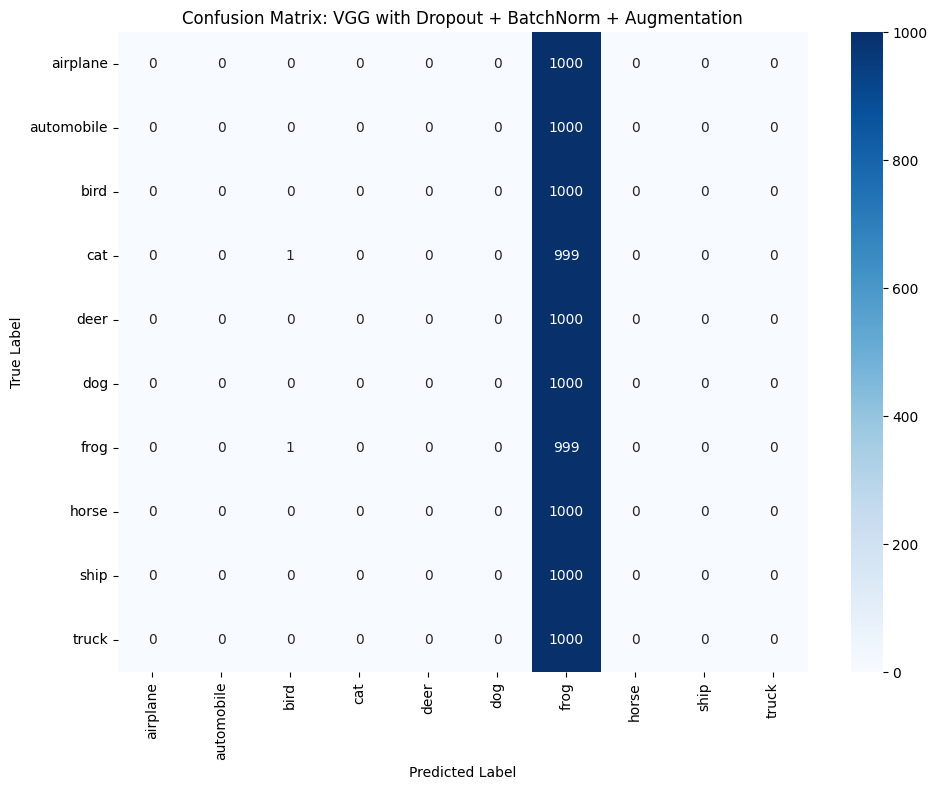


Classification Report:

              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.10      1.00      0.18      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_test_pred_probs = model.predict(x_test_resized, verbose=0)
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: VGG with Dropout + BatchNorm + Augmentation")
plt.tight_layout()
plt.show()

# Optional: Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=class_names))


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into the neural network. Without them, no matter how many layers we stack, the entire model behaves like a linear function, which limits its ability to learn complex patterns.

They are used to:

    Allow the network to model non-linear relationships.

    Control the output range of neurons (e.g., between 0 and 1, or -1 and 1).

    Enable the network to learn hierarchical features, like edges, shapes, objects.

    

2 - Key Differences between sigmoid and softmax:

| Feature          |           Sigmoid                          | Softmax                                           |
| ---------------- | ------------------------------------- | ------------------------------------------------------ |
|      Use Case    | Binary classification                 | Multi-class classification                             |
|     Output       | Scalar between 0 and 1                | Vector of probabilities that sum to 1                  |
|      Formula     | $\sigma(x) = \frac{1}{1 + e^{-x}}$    | $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$ |
|     Independence |      Each output is independent       | Outputs are interdependent                             |
|      Example     |     Used for binary/multi-label tasks | Used for single-label multi-class tasks                |



3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Use binary crossentropy when each class is independent (e.g., multi-label), while categorical crossentropy is used when there is only one correct class per sample.